In [35]:
# imports

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

from sklearn import set_config
set_config(transform_output='pandas')

import plotly.express as px

from sklearn.metrics import silhouette_score

from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


In [2]:
# read file

import_85 = pd.read_csv('imports-85.data', header=None)
import_85.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
# retitle columns to use

import_85 = import_85.rename(columns={21:'horsepower', 25:'price'})
import_85.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,horsepower,22,23,24,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
# check for dupes

import_85.duplicated().sum()

np.int64(0)

In [5]:
# pick columns to use

for_model = import_85[['horsepower', 'price']]
for_model.head()

,horsepower,price
0,111,13495
1,111,16500
2,154,16500
3,102,13950
4,115,17450


In [6]:
# info check

for_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   horsepower  205 non-null    object
 1   price       205 non-null    object
dtypes: object(2)
memory usage: 3.3+ KB


In [7]:
# Data type is object but they should be numbers do value checks

for_model['price'].value_counts()

price
?        4
16500    2
6229     2
7609     2
7957     2
        ..
16845    1
19045    1
21485    1
22470    1
22625    1
Name: count, Length: 187, dtype: int64

In [8]:
for_model['horsepower'].value_counts()

horsepower
68     19
70     11
69     10
116     9
110     8
95      7
88      6
114     6
62      6
101     6
160     6
102     5
76      5
97      5
82      5
145     5
84      5
123     4
86      4
92      4
111     4
121     3
90      3
182     3
85      3
73      3
152     3
207     3
112     2
56      2
156     2
161     2
52      2
162     2
?       2
155     2
100     2
94      2
184     2
176     2
115     1
154     1
140     1
48      1
120     1
64      1
135     1
262     1
78      1
60      1
58      1
55      1
288     1
143     1
142     1
200     1
175     1
72      1
134     1
106     1
Name: count, dtype: int64

In [9]:
# Replace ? with nan

for_model['horsepower'] = for_model['horsepower'].replace('?', np.nan)
(for_model['horsepower'] == '?').sum()


C:\Users\nick_\AppData\Local\Temp\ipykernel_24300\2363319794.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_model['horsepower'] = for_model['horsepower'].replace('?', np.nan)


np.int64(0)

In [10]:
# change datatype to numeric

for_model['horsepower'] = for_model['horsepower'].astype('float')

C:\Users\nick_\AppData\Local\Temp\ipykernel_24300\1224966785.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_model['horsepower'] = for_model['horsepower'].astype('float')


In [11]:
# compute mean and impute

hp_mean = for_model['horsepower'].mean()
for_model['horsepower'] = for_model['horsepower'].fillna(hp_mean)

C:\Users\nick_\AppData\Local\Temp\ipykernel_24300\145741834.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_model['horsepower'] = for_model['horsepower'].fillna(hp_mean)


In [12]:
# Replace price ? with nan

for_model['price'] = for_model['price'].replace('?', np.nan)
(for_model['price'] == '?').sum()

C:\Users\nick_\AppData\Local\Temp\ipykernel_24300\993261693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_model['price'] = for_model['price'].replace('?', np.nan)


np.int64(0)

In [13]:
# change datatype to numeric

for_model['price'] = for_model['price'].astype('float')

C:\Users\nick_\AppData\Local\Temp\ipykernel_24300\4086988656.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_model['price'] = for_model['price'].astype('float')


In [14]:
# compute mean and impiute for nan

price_mean = for_model['price'].mean()
for_model['price'] = for_model['price'].fillna(price_mean)

C:\Users\nick_\AppData\Local\Temp\ipykernel_24300\2966029506.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_model['price'] = for_model['price'].fillna(price_mean)


In [15]:
# check all work above

for_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   horsepower  205 non-null    float64
 1   price       205 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [16]:
# scale numbers for model

scaled_df = StandardScaler().fit_transform(for_model)

scaled_df.head()

,horsepower,price
0,0.171065,0.036674
1,0.171065,0.419498
2,1.261807,0.419498
3,-0.057230,0.094639
4,0.272529,0.540524


In [17]:
# make model with scaled data

kmeans = KMeans(n_clusters=2, random_state=42)

kmeans.fit(scaled_df)

c:\Users\nick_\Desktop\Learning Fuze\Bootcamp\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\nick_\Desktop\Learning Fuze\Bootcamp\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\nick_\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\nick_\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1036, in _

KMeans(n_clusters=2, random_state=42)

In [18]:
# Create dataframe with cluster column for charts

charter = scaled_df.copy()

charter['cluster'] = kmeans.labels_

charter.head()

,horsepower,price,cluster
0,0.171065,0.036674,0
1,0.171065,0.419498,0
2,1.261807,0.419498,1
3,-0.057230,0.094639,0
4,0.272529,0.540524,0


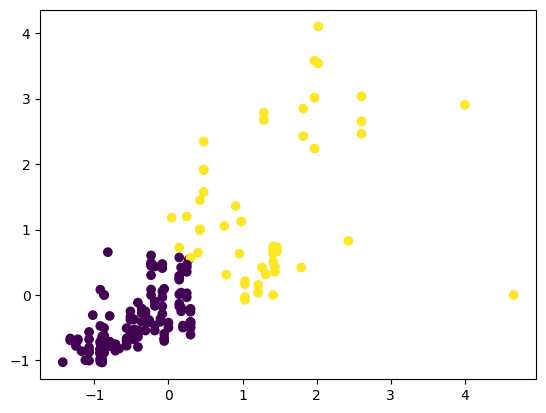

In [19]:
# Plot clusters

plt.scatter(charter['horsepower'], charter['price'], c=charter['cluster'])

In [20]:
# Make loop to check for best value of k

ks = range(2,16)
s_scores = []
inertias = []

for k in ks:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(scaled_df)
  s_scores.append(silhouette_score(scaled_df, kmeans.labels_))
  inertias.append(kmeans.inertia_)


Text(0.5, 1.0, 'Silhos/k')

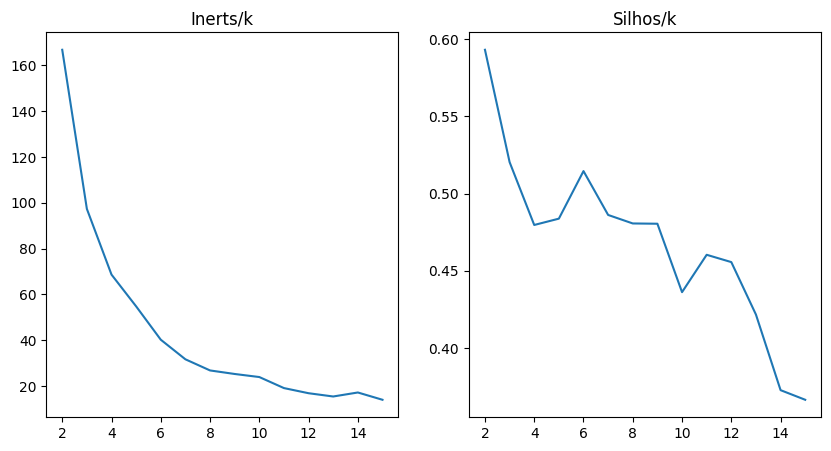

In [21]:
##Plot variables above to visualize best values of K

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(ks, inertias)
axes[0].set_title('Inerts/k')

axes[1].plot(ks, s_scores)
axes[1].set_title('Silhos/k')

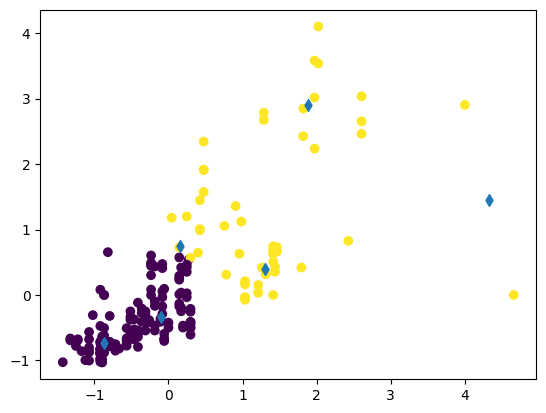

In [24]:
# add cluster centers to cluster plot above

kmeans6 = KMeans(n_clusters=6, random_state=42).fit(scaled_df)
plt.scatter(charter['horsepower'], charter['price'], c=charter['cluster'])
plt.scatter(kmeans6.cluster_centers_[:,0], kmeans6.cluster_centers_[:,1], marker='d')

In [28]:
# Generate DB Scan model -- first determine min sample and epsilon

# Determine distance between each point and the next three closest (4 neighbors means reference point plus three closest -- 4 neighbors)

min_samples = 4
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors.fit(scaled_df)
distances, indices = neighbors.kneighbors(scaled_df)
distances

array([[0.00000000e+00, 3.59531115e-02, 7.67777188e-02, 1.03875396e-01],
       [0.00000000e+00, 7.61222686e-02, 8.78788188e-02, 1.00476202e-01],
       [0.00000000e+00, 1.08180195e-01, 1.14987188e-01, 1.76333872e-01],
       [0.00000000e+00, 4.64026450e-02, 1.30521377e-01, 1.77932447e-01],
       [0.00000000e+00, 3.77071714e-02, 8.11412994e-02, 1.21786035e-01],
       [0.00000000e+00, 2.67531170e-02, 3.31229068e-02, 1.38067746e-01],
       [0.00000000e+00, 1.31084301e-01, 1.49794785e-01, 1.52286160e-01],
       [0.00000000e+00, 1.54148912e-01, 2.20370759e-01, 2.26178472e-01],
       [0.00000000e+00, 2.48511975e-01, 3.40395941e-01, 4.81245262e-01],
       [0.00000000e+00, 2.06307193e-01, 2.06307193e-01, 2.53446742e-01],
       [0.00000000e+00, 6.30609187e-02, 1.04614561e-01, 1.55895870e-01],
       [0.00000000e+00, 6.30609187e-02, 1.08200774e-01, 1.52229879e-01],
       [0.00000000e+00, 1.71984324e-02, 2.75648360e-01, 3.36222628e-01],
       [0.00000000e+00, 1.71984324e-02, 2.62727174e

In [30]:
# make array with furthest point from each datapoint above -- each row above is the distances to each point in the cluster, array below plots this out

n_th_neighbor = distances[:, min_samples -1]
n_th_neighbor

array([1.03875396e-01, 1.00476202e-01, 1.76333872e-01, 1.77932447e-01,
       1.21786035e-01, 1.38067746e-01, 1.52286160e-01, 2.26178472e-01,
       4.81245262e-01, 2.53446742e-01, 1.55895870e-01, 1.52229879e-01,
       3.36222628e-01, 3.33293720e-01, 4.40789452e-01, 6.72963835e-01,
       5.65000352e-01, 5.65000352e-01, 3.06028365e-01, 5.14242281e-02,
       4.31497252e-02, 2.70171554e-02, 2.39504095e-02, 7.65648729e-02,
       1.70710366e-02, 2.93010329e-03, 2.89796120e-02, 1.09957836e-01,
       5.37610256e-02, 1.90194211e-01, 1.09679717e-01, 5.15100008e-02,
       1.46642639e-01, 7.64374772e-02, 3.49064479e-02, 5.60541499e-02,
       5.60541499e-02, 6.30601624e-02, 5.53635689e-02, 5.12988844e-02,
       1.09111914e-01, 1.30521377e-01, 1.22238803e-01, 6.70396237e-02,
       3.28585891e-01, 3.28585891e-01, 6.96855000e-02, 5.86908230e-01,
       5.36392659e-01, 1.46357350e+00, 4.62960212e-02, 1.70710366e-02,
       1.31217669e-02, 3.31229068e-03, 2.72627002e-02, 1.23655702e-01,
      

In [32]:
# sort values for plotting

n_th_neighbors_sorted = np.sort(n_th_neighbor)
n_th_neighbors_sorted

array([2.93010329e-03, 2.93010329e-03, 3.31229068e-03, 3.31229068e-03,
       1.19752048e-02, 1.31217669e-02, 1.70710366e-02, 1.70710366e-02,
       1.70710366e-02, 2.39504095e-02, 2.47147843e-02, 2.54047726e-02,
       2.59508646e-02, 2.60342217e-02, 2.70171554e-02, 2.70171554e-02,
       2.72627002e-02, 2.77847807e-02, 2.81604597e-02, 2.86178090e-02,
       2.89796120e-02, 2.89796120e-02, 2.89796120e-02, 3.18489488e-02,
       3.18489488e-02, 3.31229068e-02, 3.49064479e-02, 3.50618088e-02,
       3.51498784e-02, 3.82187386e-02, 4.07666545e-02, 4.31497252e-02,
       4.47097137e-02, 4.58624863e-02, 4.58705860e-02, 4.58705860e-02,
       4.62960212e-02, 4.85377980e-02, 5.08026771e-02, 5.12988844e-02,
       5.12988844e-02, 5.12988844e-02, 5.14035519e-02, 5.14242281e-02,
       5.15100008e-02, 5.37610256e-02, 5.37610256e-02, 5.37610256e-02,
       5.53635689e-02, 5.60541499e-02, 5.60541499e-02, 5.67709631e-02,
       5.73540232e-02, 6.12935479e-02, 6.12935479e-02, 6.12935479e-02,
      

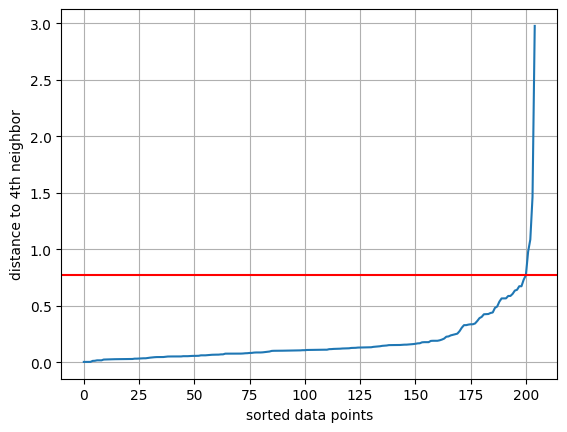

In [34]:
# Plot with epsilon to visualize

epsilon = .77
plt.plot(n_th_neighbors_sorted)
plt.ylabel(f'distance to {min_samples}th neighbor')
plt.xlabel('sorted data points')
plt.axhline(y=epsilon, color='r')
plt.grid()

In [36]:
# Create dbscan model

dbs = DBSCAN(eps=epsilon, min_samples=min_samples).fit(scaled_df)

In [37]:
# Check how many clusters there are

np.unique(dbs.labels_)

# there are three clusters -- -1 is noise, 0 and 1 are the others

array([-1,  0,  1])

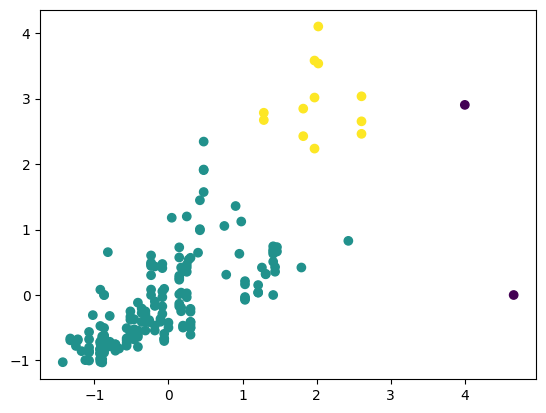

In [38]:
# Plot to visualize outliers

plt.scatter(scaled_df.iloc[:,0], scaled_df.iloc[:,1], c=dbs.labels_)